### Librairies

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV

C:\Users\Hervé K. PADJOUO\AppData\Local\Temp\ipykernel_11388\1537137912.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### Données

Deux type de données peuvent être utilisés pour modéliser la probabilité de défaut de paiement :
* Données liées à la demande de crédit.
* Données comportementales décrivant le bénéficiaire du prêt.

Dans la pratique, les banques utilisent un mélange de ces deux types de données pour construire leur modèle de scoring.


In [3]:
# Importation des données

df = pd.read_csv("Base.txt")
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [4]:
# Informations

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [5]:
df.nunique()

person_age                      58
person_income                 4295
person_home_ownership            4
person_emp_length               36
loan_intent                      6
loan_grade                       7
loan_amnt                      753
loan_int_rate                  348
loan_status                      2
loan_percent_income             77
cb_person_default_on_file        2
cb_person_cred_hist_length      29
dtype: int64

L'ensemble de données comporte 12 variables et 32581 observations historiques. Chaque observation correspond à une personne ayant contracté un prêt. On a des variables qui décrivent le crédit (montant statut, taux d'intérêt, etc.) et d'autres variables qui décrivent la personne ayant contracté ce crédit (âge, revenu, etc.). Nous allons donc utiliser ces données historiques afin de construire le modèle de **scoring** qui va prédire le statut des nouveaux candidats à un crédit.

### Analyse exploratoire des données

In [6]:
# Résumé statistique des données

df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


Nous remarquons que les moyennes et les écart-types sont très différents d'une variables à une autre. Cela indique que les données ne sont pas à la même échelle. Selon l'algorithme que nous utilisons, il faudra probablement normaliser les données avant de les modéliser. En effet, certains algorithmes de Machine Leanrning nécessitent une normalisation des données pour un meilleur résultat.

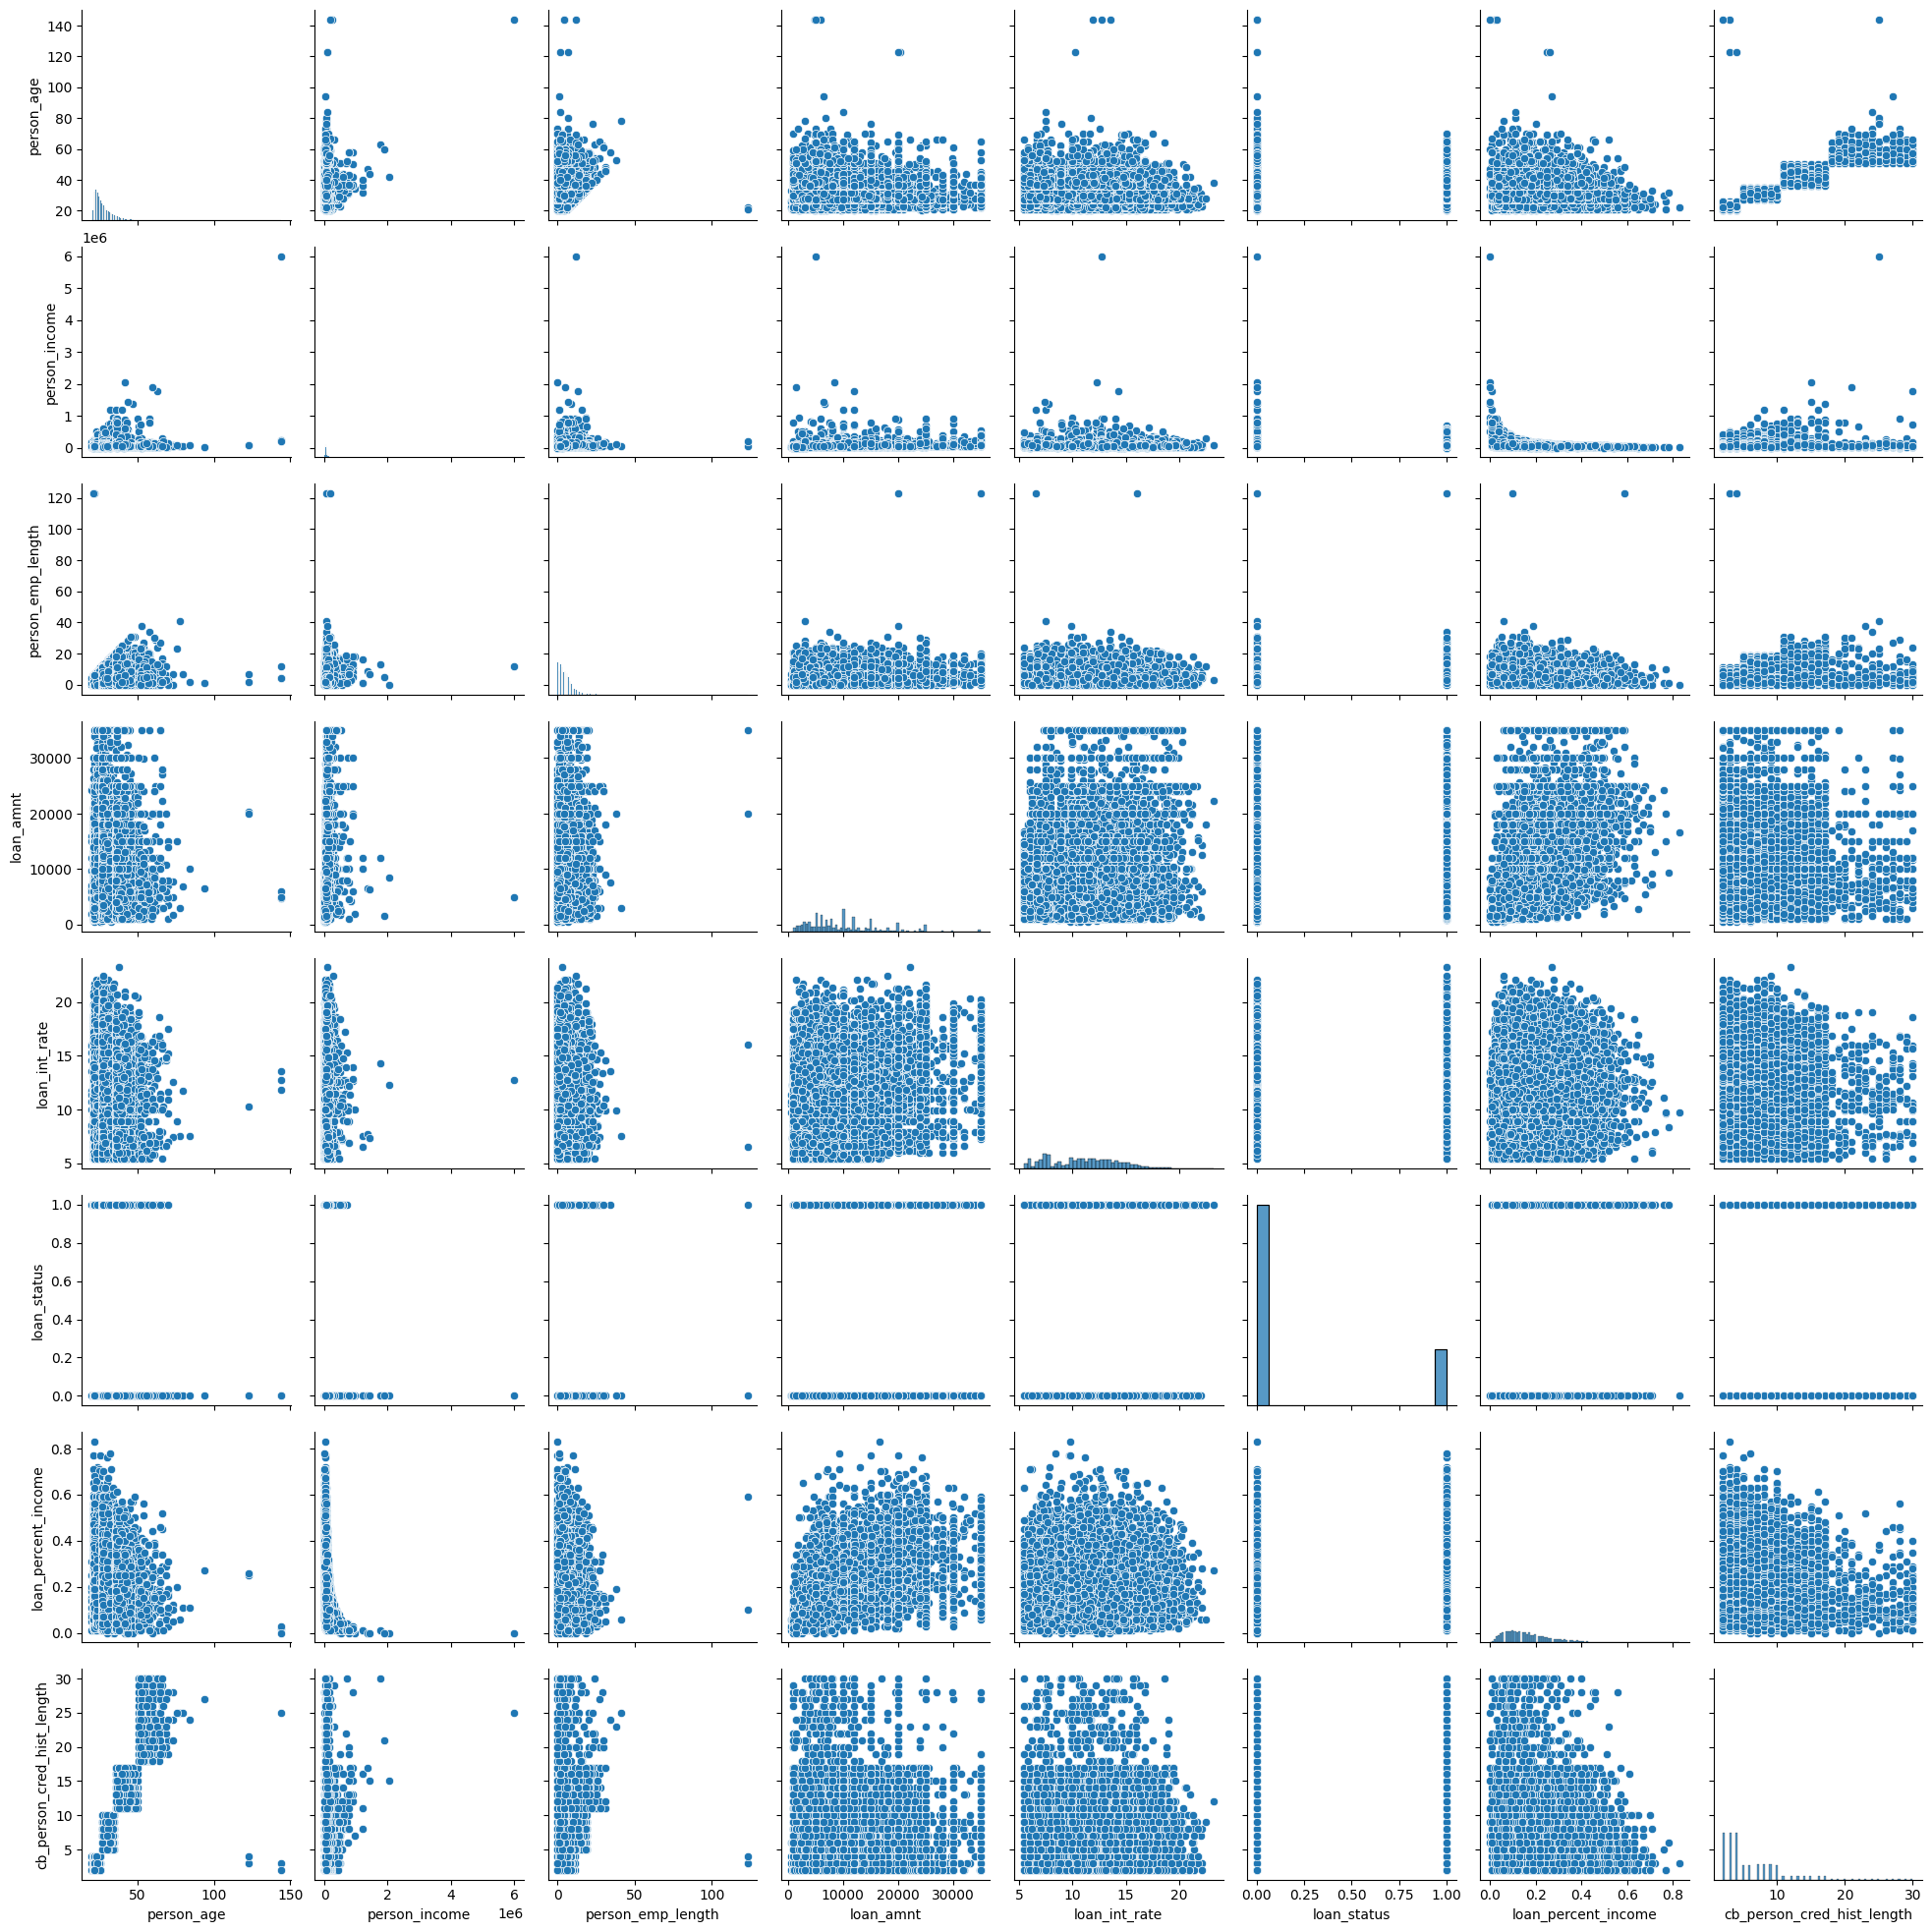

In [7]:
# Utilisation de la fontion pairplot de Seaborn pour visualiser les distributions des variables ainsi que les nuages de points.

# Distribution des variables et nuages de points 

sns.pairplot(df)
plt.show()

C:\Users\Hervé K. PADJOUO\AppData\Local\Temp\ipykernel_11388\1993644829.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['loan_amnt'])


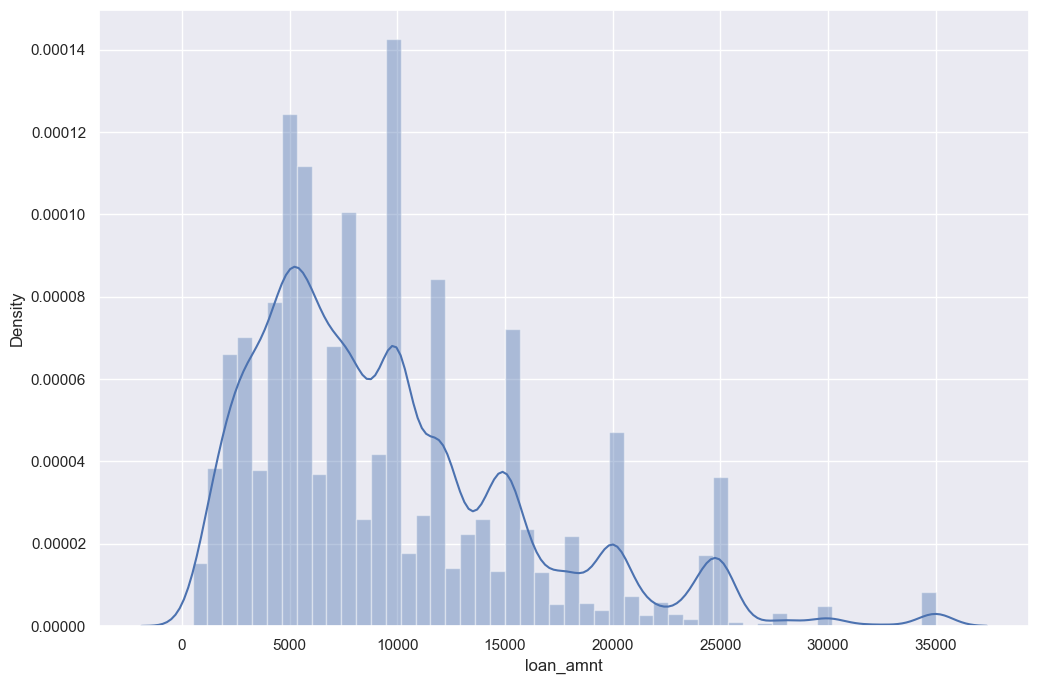

In [8]:
# Distribution de la variable 'loan_amnt'

sns.set(rc={'figure.figsize':(12,8)})
sns.distplot(df['loan_amnt'])
plt.show()

In [9]:
# Coefficients d'asymétrie pour les variables continues ...
# Variables numériques
Var_num = df.nunique()[df.nunique()>8].keys().to_list()
df_num = df[Var_num]
df_num.skew()

person_age                     2.581393
person_income                 32.865349
person_emp_length              2.614455
loan_amnt                      1.192477
loan_int_rate                  0.208550
loan_percent_income            1.064669
cb_person_cred_hist_length     1.661790
dtype: float64

Le coefficient de la variable ***person_income*** est très élevé. Pour corriger cela, faisons une transformation logarithmque de cette variable.

In [10]:
# Transformation log de la variable 'person_income'

df['person_income'] = np.log(df['person_income'])

# Coefficient d'asymétrie de la variable transformée

df['person_income'].skew()

0.1559408016162584

Traçons à présent le nuage de point des revenus en fonction de l'âge : 

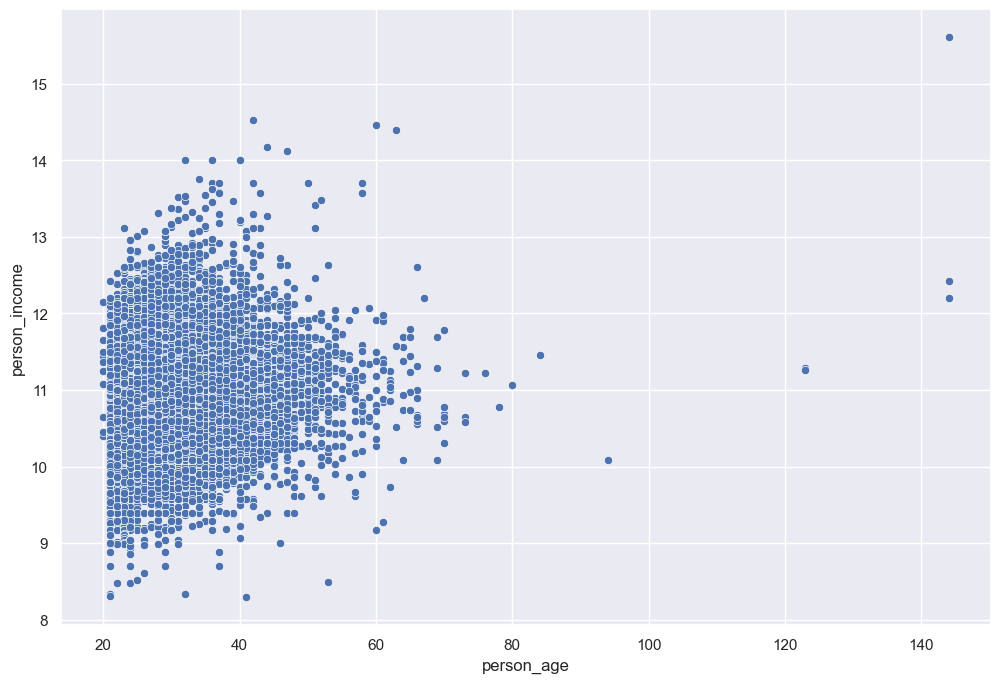

In [11]:
# Pour tracer un nuage de point 

sns.set(rc={'figure.figsize':(12,8)})

sns.scatterplot(x='person_age', y='person_income', data=df)

plt.show()

Le nuage de point ci-dessus nous montre qu'il y a une trés faible corrélation positive entre les revenus et l'âge. Nous remarquons aussi des outliers.

#### Analysons à présent la fréquence des modalités de chaque variable catégorielle :

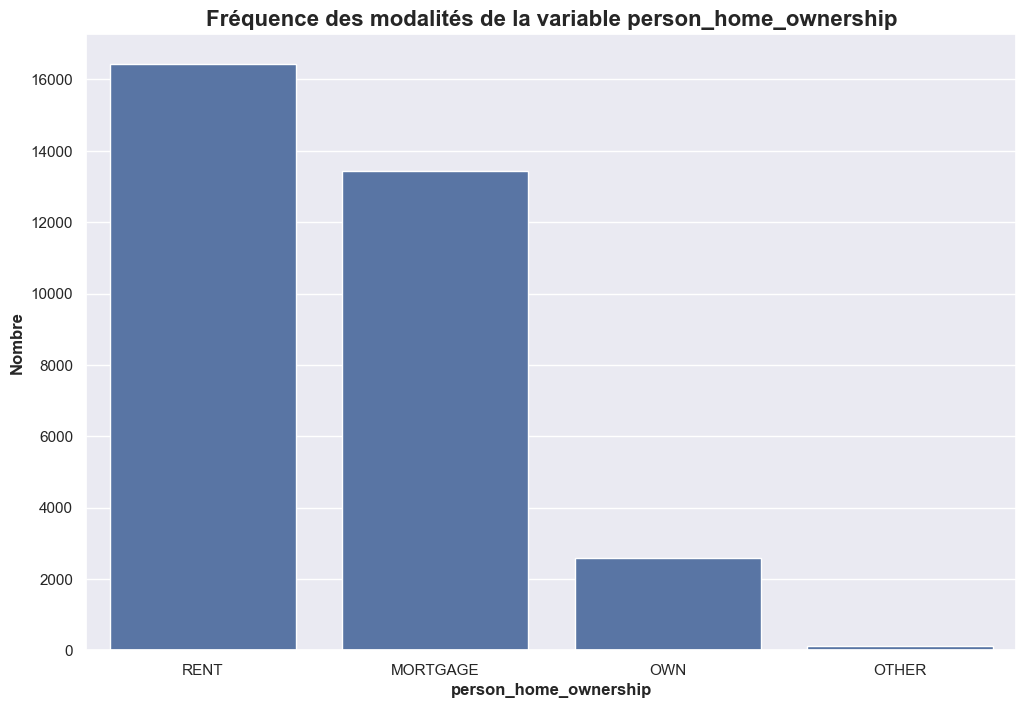

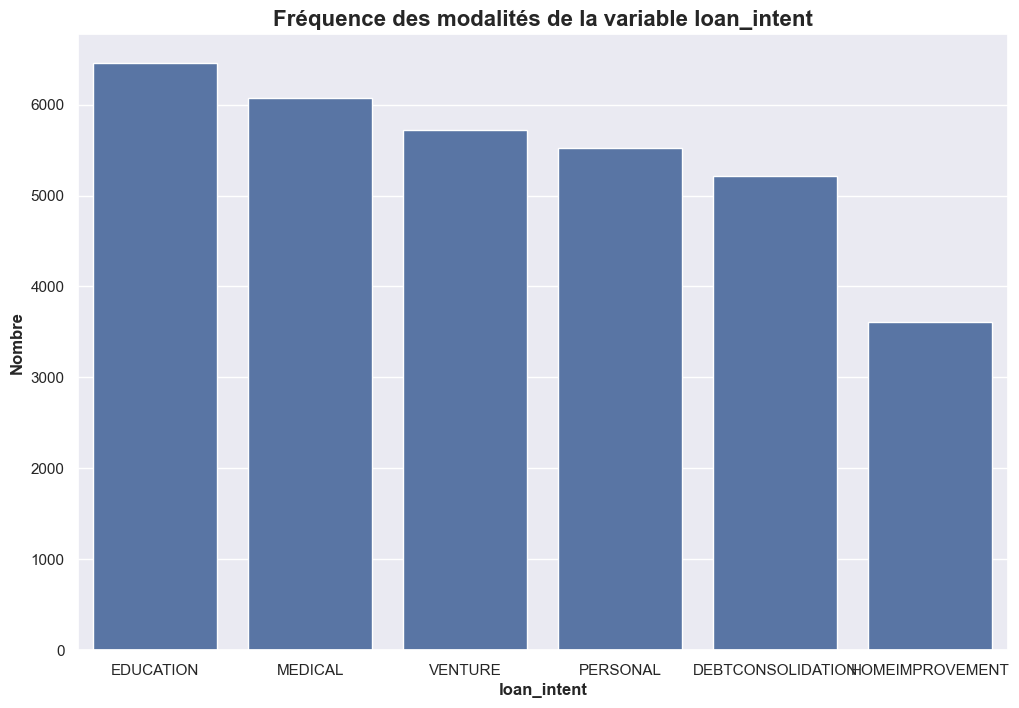

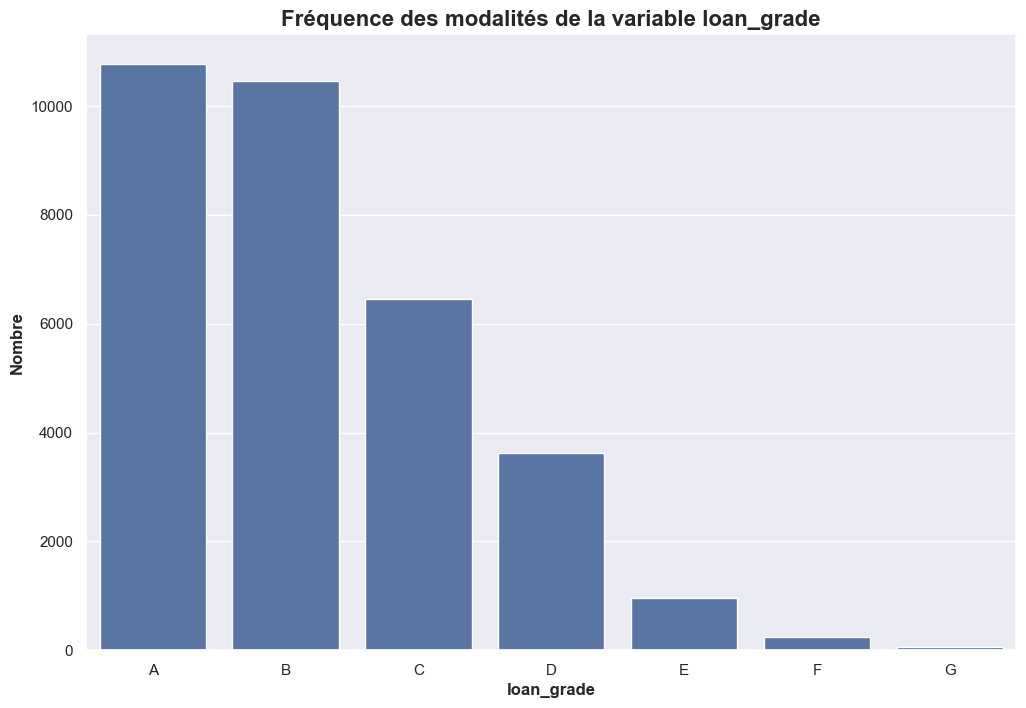

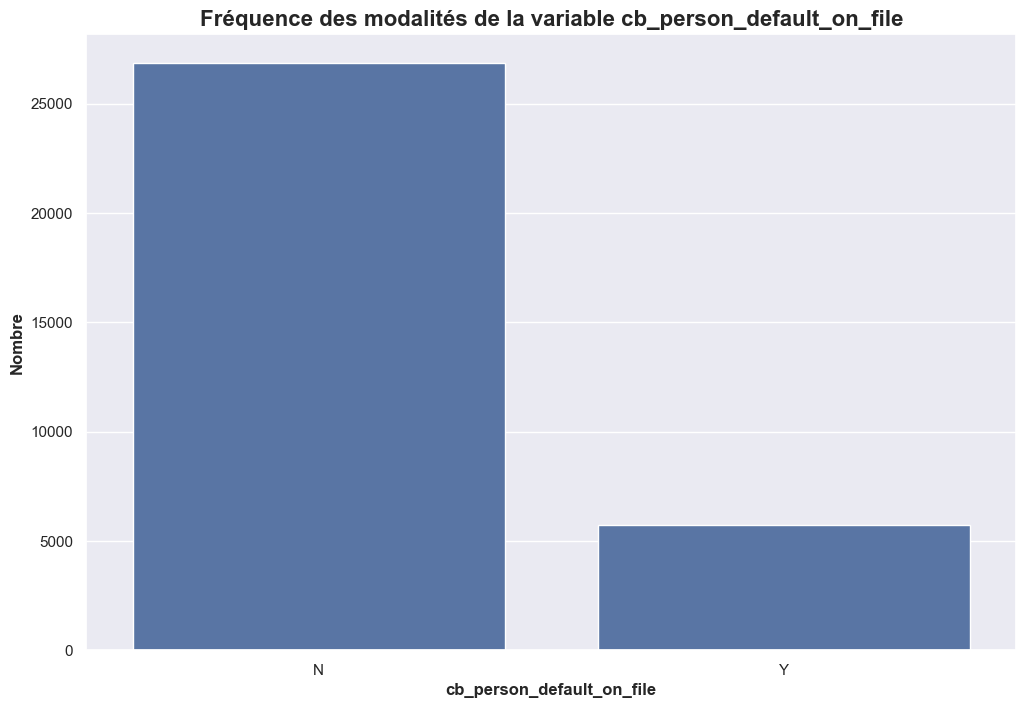

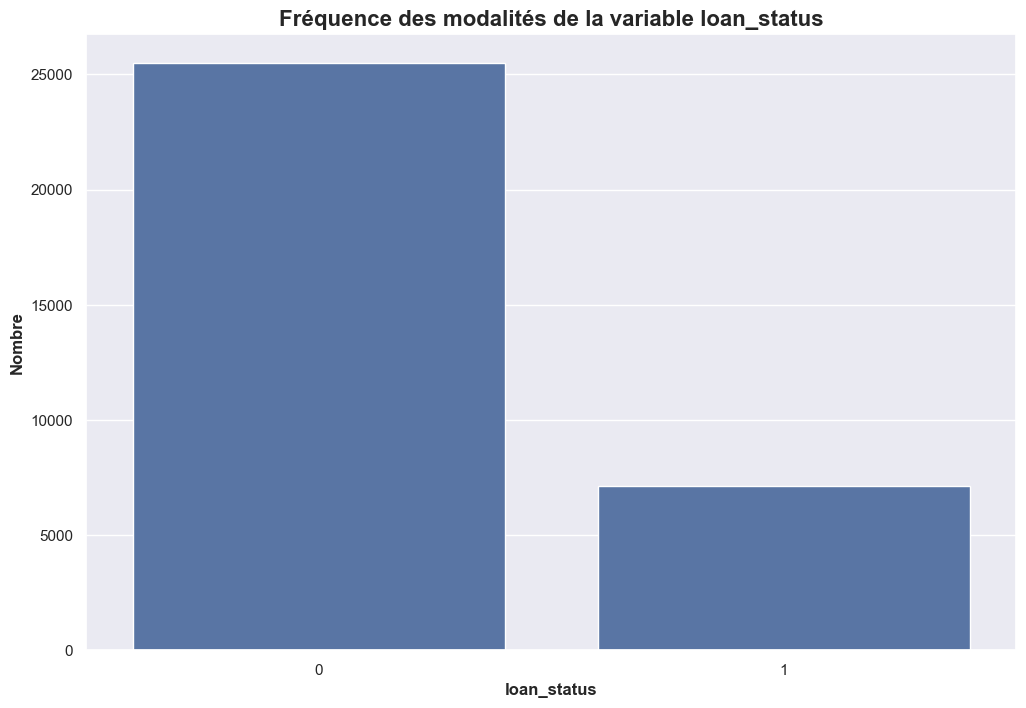

In [12]:
# Boucle for pour construire un diagramme à barre pour toutes les variables qualitatives

for col in df.select_dtypes(include=['object']).columns.to_list() + ['loan_status']:
    sns.barplot(x=df[col].value_counts().index, y=df[col].value_counts())
    plt.xlabel(col, fontweight="bold")
    plt.ylabel('Nombre', fontweight="bold")
    plt.title('Fréquence des modalités de la variable ' + str(col), fontsize=16, fontweight="bold")
    plt.show()
    print('\n')

Nous remarquons un déséquilibre de classe au niveau de la variable d'intérêt(***loan_status***). Il y a beaucoup plus de personnes qui n'ont pas été en défaut de paiement que de personnes en défaut de paiement. Ce problème pourrait impacter la qualité de notre modèle car ce dernier pourrait avoir tendance à prédire que tous les nouveaux demandeurs de prêts ne seront pas en défaut de paiement. Ceci causerait d'énorme pertes d'argent à la banque. Il existe plusieurs méthodes pour traiter les problèmes de déséquilibre de classe. Nous utiliserons l'une de ces méthodes dans la partie prétraitement de données avant la modélisation.

Très souvent, les données financières sont souvent analysées avec des tableaux croisés dynamiques comme dans Excel.

In [13]:
# Tableau croisé dynamique entre le motif de prêt et le statut du prêt

pd.crosstab(df["loan_intent"], df["loan_status"], margins = True)

loan_status,0,1,All
loan_intent,,,
DEBTCONSOLIDATION,3722,1490,5212
EDUCATION,5342,1111,6453
HOMEIMPROVEMENT,2664,941,3605
MEDICAL,4450,1621,6071
PERSONAL,4423,1098,5521
VENTURE,4872,847,5719
All,25473,7108,32581


In [14]:
# Tableau croisé dynamique de l'accès à la propriété groupé par le statut ainsi que le grade du crédit 

pd.crosstab(df["person_home_ownership"], [df["loan_status"], df["loan_grade"]]) 

loan_status               0                                 1             \
loan_grade                A     B     C    D    E   F  G    A     B    C   
person_home_ownership                                                      
MORTGAGE               5219  3729  1934  658  178  36  0  239   324  321   
OTHER                    23    29    11    9    2   0  0    3     5    6   
OWN                     860   770   464  264   26   7  0   66    34   31   
RENT                   3602  4222  2710  554  137  28  1  765  1338  981   

loan_status                               
loan_grade                D    E   F   G  
person_home_ownership                     
MORTGAGE                553  161  61  31  
OTHER                    11    6   2   0  
OWN                      18   31   8   5  
RENT                   1559  423  99  27

In [15]:
# Tableau croisé dynamique du % moyen du revenu par rapport au montant du prêt groupé par les variables "person_home_ownership" et "loan_status"

pd.crosstab(df["person_home_ownership"], df['loan_status'], values=df["loan_percent_income"]*100, aggfunc='mean')

loan_status,0,1
person_home_ownership,,
MORTGAGE,14.650417,18.488166
OTHER,14.378378,30.000000
OWN,18.001255,29.735751
RENT,14.461081,26.485940


Par exemple, le revenu de ceux qui ont leur propre maison (donc les propriétaires) et qui sont en défaut de paiement est égal en moyenne à 29.73% du montant de leur crédit.

Quelle est la relation entre le pourcentage du revenu et le statut du crédit ?

c:\Users\Hervé K. PADJOUO\OneDrive - GENES\Bureau\DefautsCredits\.venv\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


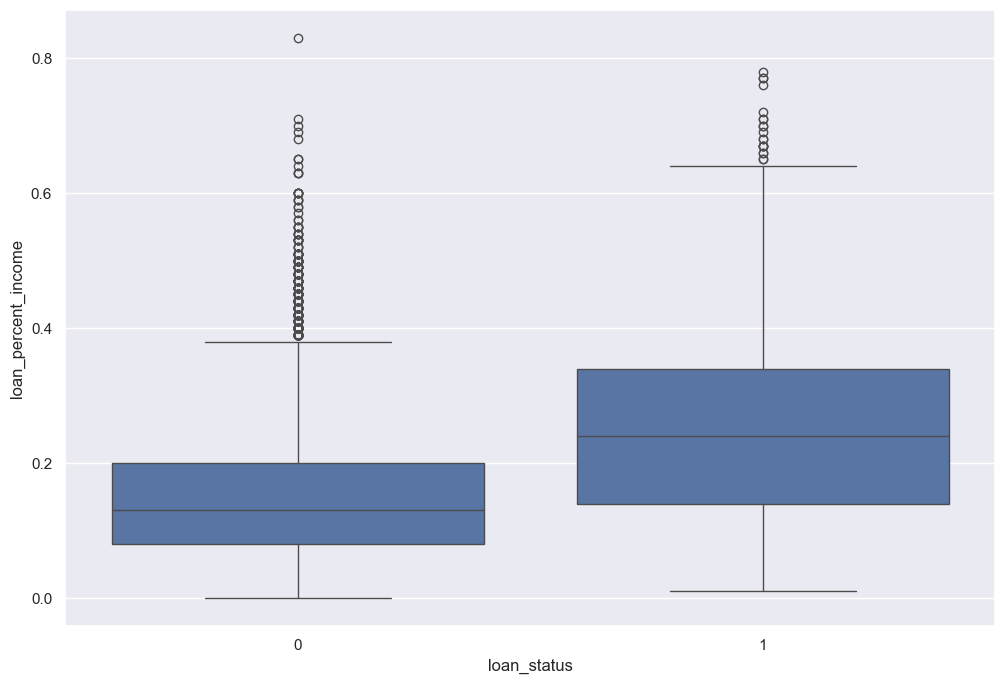

In [16]:
sns.boxplot(x='loan_status', y='loan_percent_income', data = df)
plt.show()

Selon ce graphique, le pourcentage moyen de revenu (par rapport au montant du prêt) pour les personnes en défaut de paiement est plus élevé. Cela indique que ces bénéficiaires ont un ratio dette / revenu déjà trop élevé. En effet, lorsque le ratio dette / revenu est très important, cela veut dire tout simplement que le crédit est trop élevé par rapport aux revenus de la personne. Et lorsqu'on a un crédit trop élevé par rapport au revenus, le risque d'être en défaut de paiement est logiquement et naturellement élevé.

c:\Users\Hervé K. PADJOUO\OneDrive - GENES\Bureau\DefautsCredits\.venv\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


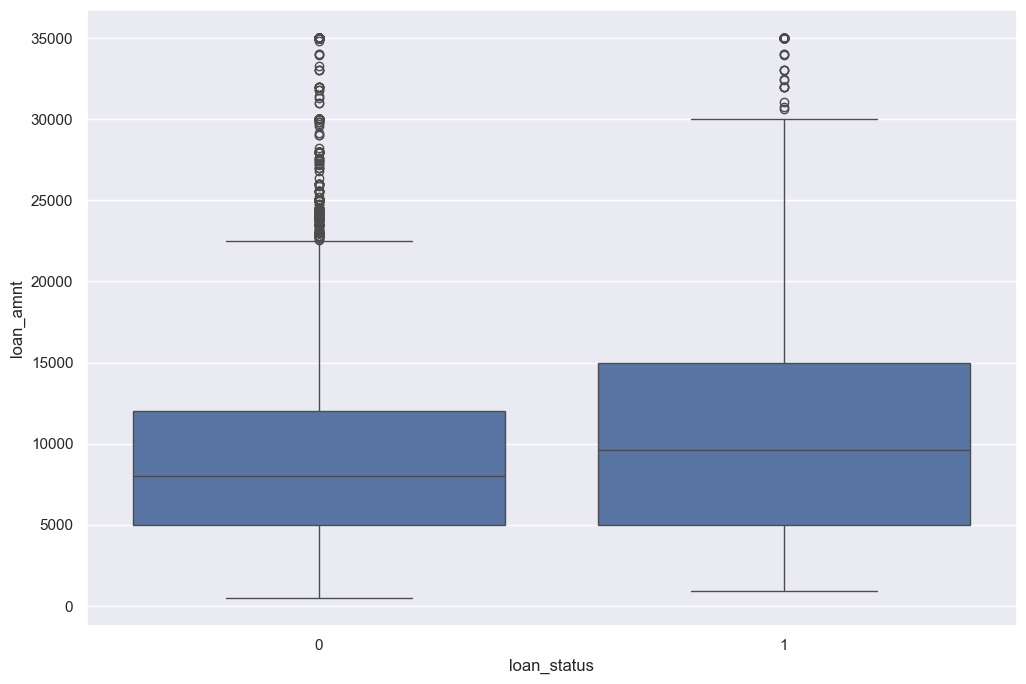

In [17]:
# loan_amnt vs loan_statut 

sns.boxplot(x='loan_status', y='loan_amnt', data=df)
plt.show()

Globalement, les personnes en défaut de paiement ont un crédit supérieur à celui des personnes qui ont remboursé leurs prêts.

c:\Users\Hervé K. PADJOUO\OneDrive - GENES\Bureau\DefautsCredits\.venv\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='loan_grade', ylabel='loan_int_rate'>

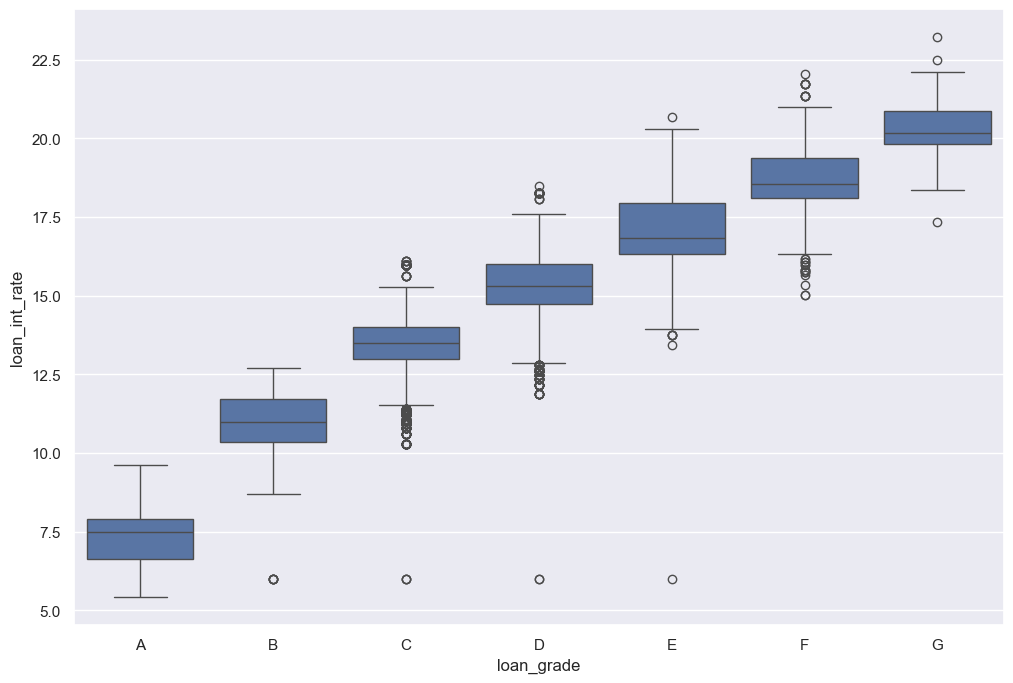

In [18]:
# loan_int_rate vs loan_grade

credit_grade = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
sns.set(rc={'figure.figsize': (12,8)})
sns.boxplot(x='loan_grade', y='loan_int_rate', data=df, order=credit_grade)

Plus le crédit est important (grade élevé), plus le taux d'intérêt est élevé.

Construisons le même graphique sans les outliers pour voir si on a la même tendance

c:\Users\Hervé K. PADJOUO\OneDrive - GENES\Bureau\DefautsCredits\.venv\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


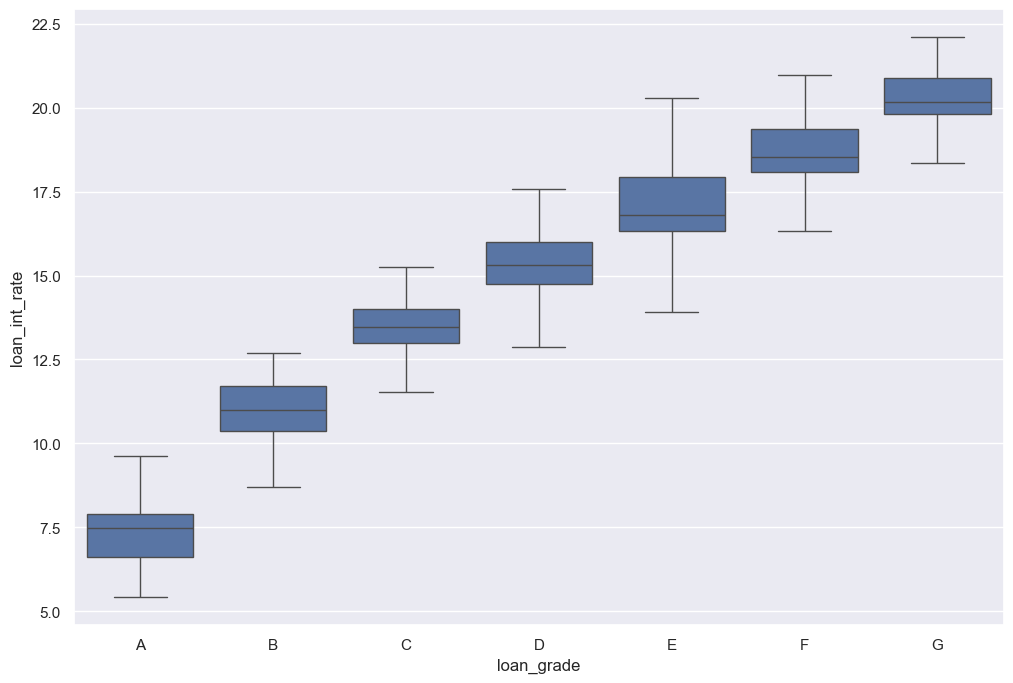

In [19]:
# Meême graphique sans les outliers

sns.set(rc={'figure.figsize': (12,8)})
sns.boxplot(x='loan_grade', y='loan_int_rate', showfliers=False, data=df, order=credit_grade)
plt.show()

##### Corrélation

Text(0.5, 1.0, 'Carte des corrélations')

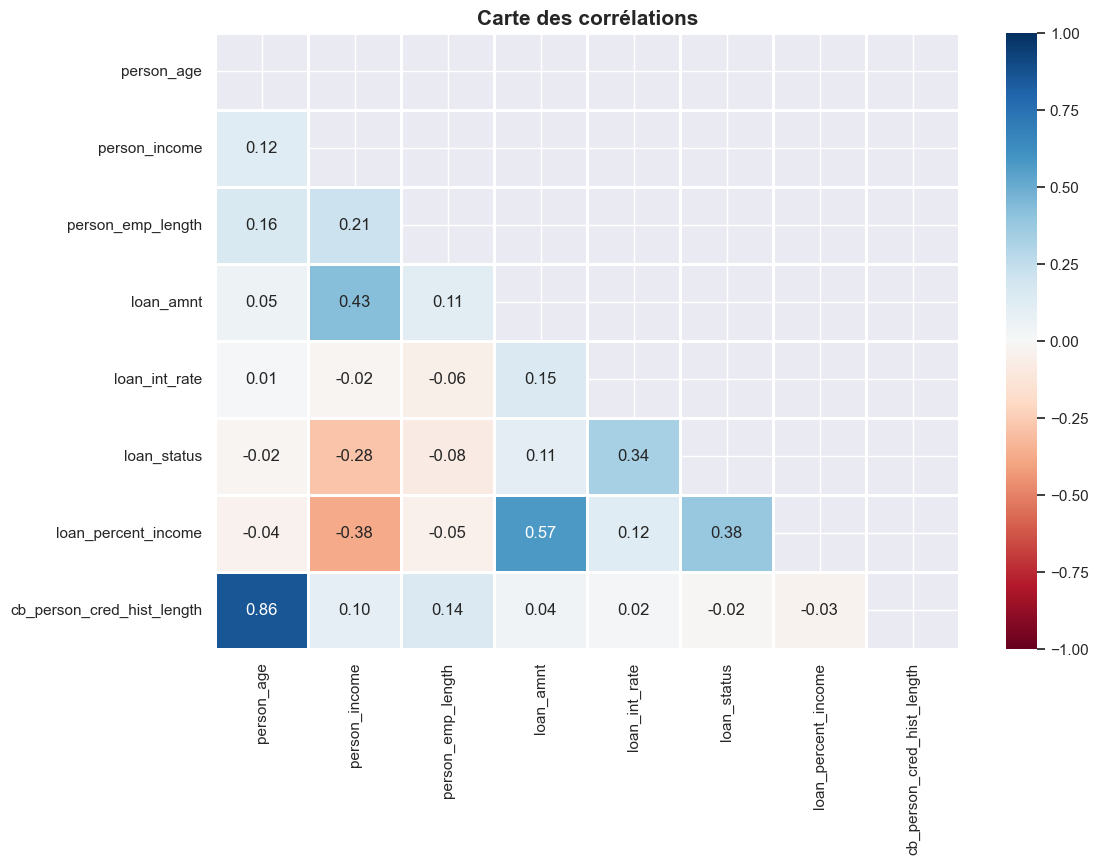

In [20]:
# Carte des corrélations 

mask = np.triu(np.ones_like(df.select_dtypes(exclude=['object']).corr(), dtype=bool))

sns.heatmap(df.select_dtypes(exclude=['object']).corr(), mask=mask, center=0, cmap='RdBu', linewidths=1, annot=True, fmt=".2f", vmin=-1, vmax=1)

plt.title('Carte des corrélations', fontsize=15, fontweight="bold")

### Nettoyage des données

Lors de l'analyse exploratoire des données, nous avons remarqué la présence d'***outliers***. Ces valeurs aberrantes peuvent affecter la qualité d'un modèle de Machine Learning. Nous allons donc les retirer des données.

Avant de retirer les outliers, il faut d'abord les détecter. L'analyse exploratoire nous a permis de savoir que cette banque avait par exemple des client(e)s de plus de 100 ans, même de plus de 140 ans. Nous pouvons utiliser le 'bon sens' pour dire qu'il est très peu probable qu'une personne qui demande un crédit ait plus de 100 ans. Ainsi on supprimerait toutes les lignes ou la variable ***'person_age'*** a des valeurs supérieures à 100.

##### Suppression des outliers

* Methode de detection des valeurs abérrantes basée sur l'inter-quartile (IQR)

In [21]:
def detection_outliers_by_iqr(x):
    Q1, Q3 = np.quantile(x, 0.25), np.quantile(x, 0.75)
    iqr = Q3 - Q1
    borne_inf = Q1 - iqr*1.5
    borne_sup = Q3 + iqr*1.5
    return np.where(( x>borne_sup ) | ( x<borne_inf ))


* Suppression des outliers

In [22]:
# Application de la fonction detection_outliers_by_iqr 

indices_outliers_age = detection_outliers_by_iqr(df['person_age'])
print(indices_outliers_age)
print(type(indices_outliers_age))

(array([   81,   183,   575, ..., 32578, 32579, 32580], dtype=int64),)
<class 'tuple'>


Nous avons un tuple contenant un tableau Numpy donnant les indices de lignes des valeurs aberantes de la variable ***person_age***. 

Nous allons à présent supprimer ces observations

In [23]:
df.drop(indices_outliers_age[0], inplace=True) # Le tableau numpy est le premier élément du tuple 
df.shape

(31087, 12)

En supprimant les outliers, l'ensemble des données est passé de 32580 à 31087 observations.

##### les valeurs manquantes

In [24]:
# Nombre de valeurs manquantes par colonne

df.isna().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              861
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 2953
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

Commençons par une imputation par la médiane :

In [26]:
# Imputation par la médiane

df['person_emp_length'] = df['person_emp_length'].fillna(df['person_emp_length'].median())

df['loan_int_rate'] = df['loan_int_rate'].fillna(df['loan_int_rate'].median())

In [27]:
# Vérification

df.isna().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

#### Transformation des variables catégorielles en variables numériques
Nous utiliserons la fonction ***pandas.get_dummies()***.

In [28]:
# dataframe des variables numériques

vars_num = df.select_dtypes(exclude=['object'])

# dataframe des variables non-numériques

vars_cat = df.select_dtypes(include=['object'])

In [29]:
# Transformation des variables non-numériques

vars_cat_dummies = pd.get_dummies(vars_cat)

# nouvelle dataframe

df_new = pd.concat([vars_num, vars_cat_dummies], axis=1)

print(df_new.shape)

df_new.head()

(31087, 27)


,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
0,22,10.985293,123.0,35000,16.02,1,0.59,3,False,False,...,False,False,False,False,True,False,False,False,False,True
1,21,9.169518,5.0,1000,11.14,0,0.10,2,False,False,...,False,False,True,False,False,False,False,False,True,False
2,25,9.169518,1.0,5500,12.87,1,0.57,3,True,False,...,False,False,False,True,False,False,False,False,True,False
3,23,11.089805,4.0,35000,15.23,1,0.53,2,False,False,...,False,False,False,True,False,False,False,False,True,False
4,24,10.904119,8.0,35000,14.27,1,0.55,4,False,False,...,False,False,False,True,False,False,False,False,False,True


L'opération de transformation des variables qualitatives en variables numérique a porté à 27 le nombre de variables.

### Modélisation 

Nous volons construire un modèle de Machine Learning capable de prédire si une personne sera en défaut de paiement (1) ou non (0) en fonction de certaines variables. Il s'agit donc d'un problème de Classification.

Commençons par scinder la dataframe en données d'entrainement ***(train data)*** et en données d'évaluations ***(test data)*** du modèle : 

In [31]:
# Train/test data

X = df_new.drop('loan_status', axis=1) # X est une dataframe constituée uniquement des variables indépendantes de df

y = df_new['loan_status'] # y est la variable dépendante (variable d'intérêt)

seed = 123

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify= y, test_size=0.3, random_state=seed)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(21760, 26)
(9327, 26)
(21760,)
(9327,)


L'argument ***stratify = y*** est très important surtout quand on a un déséquilibre de classe dans les données. Il permet de créer des données d'entrainement et des données de test ayant les mêmes proportions d'étiquettes de classe que l'ensemble de données originel.

##### Modèle de base avec l'algorithme de forêts aléatoires ***(RandomForestClassifier)***

In [32]:
# Création du modèle 

rf = RandomForestClassifier(random_state=seed)

# Entraînement du modèle

rf.fit(X_train, y_train)

RandomForestClassifier(random_state=123)

#### Evaluation des performances du modèle

L'évalutation de la performance du modèle est une tâche qu'il faut effectuer avec soin. Il existe plusieurs métriques permettant d'évaluer cette performance. Le choix de la métrique doit être faite rigoureusement en fonction du problème business qu'on veut résoudre. 

Commençons d'abord par calculer la précision globale du modèle de forêts aléatoires.

In [34]:
# Précision globale du modèle 

print("Le score sur les données d'entraînement est :", rf.score(X_train, y_train))
print("Le score du modèle sur les données d'évaluation est :", rf.score(X_test, y_test))

Le score sur les données d'entraînement est : 0.9999540441176471
Le score du modèle sur les données d'évaluation est : 0.9356706336442586


Ces valeurs nous indiquent que pratiquement 100% des statuts de prêts ont été correctement prédits au niveau des données d'entraênement et qu'environ 94% des statuts de prêts ont été correctement prédits au niveau des données de test. Cet écart entre score d'entraînement et score de test indique qu'il y a peut-être un problème de surapprentissage ***(overfiting)***.

Une autre fonction utilisée pour évaluer les modèles de classification est la fonction ***classification_report().*** Cette fonction permet de générer d'un seul coup plusieurs métriques.

In [35]:
# Prédictions sur le test data

y_pred = rf.predict(X_test)

In [36]:
# Rapport de classification 

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      7290
           1       0.97      0.73      0.83      2037

    accuracy                           0.94      9327
   macro avg       0.95      0.86      0.90      9327
weighted avg       0.94      0.94      0.93      9327



Deux métriques sont vraiment utiles dans le rapport de classification : ***precision*** et ***recall***.

Le ***recall*** des prêts en défaut de paiement est égal à 0.73 ce qui signifie que 73% des véritables prêts en défaut de paiement ont été correctement prédits donc 27% des véritables prêts en défaut de paiement ont été mal prédits par le modèle comme étant des prêts qui ne sont pas en défaut de paiment. Ceci constitue un grand risque de perte d'argent pour la banque.

En revanche, le modèle prédit bien les prêts qui ne sont pas en défaut de paiement. 99% des véritables prêts qui ne sont pas en défaut de paiement ont été correctement prédits donc seulement 1% ont été mal prédits par le modèle comme étant des prêts en défaut de paiement. Ceci constitue un petit risque de perte d'opportunité d'affaires pour la banque.

Notre modèle a deux problèmes majeurs : ***overfiting*** et mauvaise prédiction des prêts en défaut de paiement. Ce dernier problème est certainement dû au déséquilibre de classe observé dans l'analyse exploratoire des données.

Il peut être très difficile de jongler entre la précision et le ***recall*** lorsqu'on tente d'augmenter la performance d'un modèle de classification. Heureusement, il existe une métrique qui combine les deux : ***F1-Score***.

Dans la suite nous essayerons d'améliorer la performance de notre modèle en cherchant à augmenter le  ***F1-Score*** des défauts de paiement.

### Determination de l'importance des prédicteurs

Nous allons exploiter quand même le modèle de forêts aléatoires afin de déterminer l'importance de chaque variable indépendante dans la prédiction du statut de prêt.

In [37]:
# Important des variables 

vars_imp = pd.Series(rf.feature_importances_, index = X.columns).sort_values(ascending=False)
vars_imp

loan_percent_income               0.227448
person_income                     0.143809
loan_int_rate                     0.109570
loan_amnt                         0.076076
person_emp_length                 0.060354
person_home_ownership_RENT        0.050525
loan_grade_D                      0.048754
person_age                        0.044365
cb_person_cred_hist_length        0.034412
person_home_ownership_MORTGAGE    0.028716
loan_intent_DEBTCONSOLIDATION     0.023212
loan_intent_MEDICAL               0.022241
loan_grade_C                      0.019900
person_home_ownership_OWN         0.018639
loan_intent_HOMEIMPROVEMENT       0.014150
loan_grade_E                      0.011795
loan_grade_A                      0.010900
loan_intent_EDUCATION             0.010697
loan_intent_PERSONAL              0.008946
loan_intent_VENTURE               0.008513
cb_person_default_on_file_N       0.007469
cb_person_default_on_file_Y       0.006634
loan_grade_B                      0.005134
loan_grade_

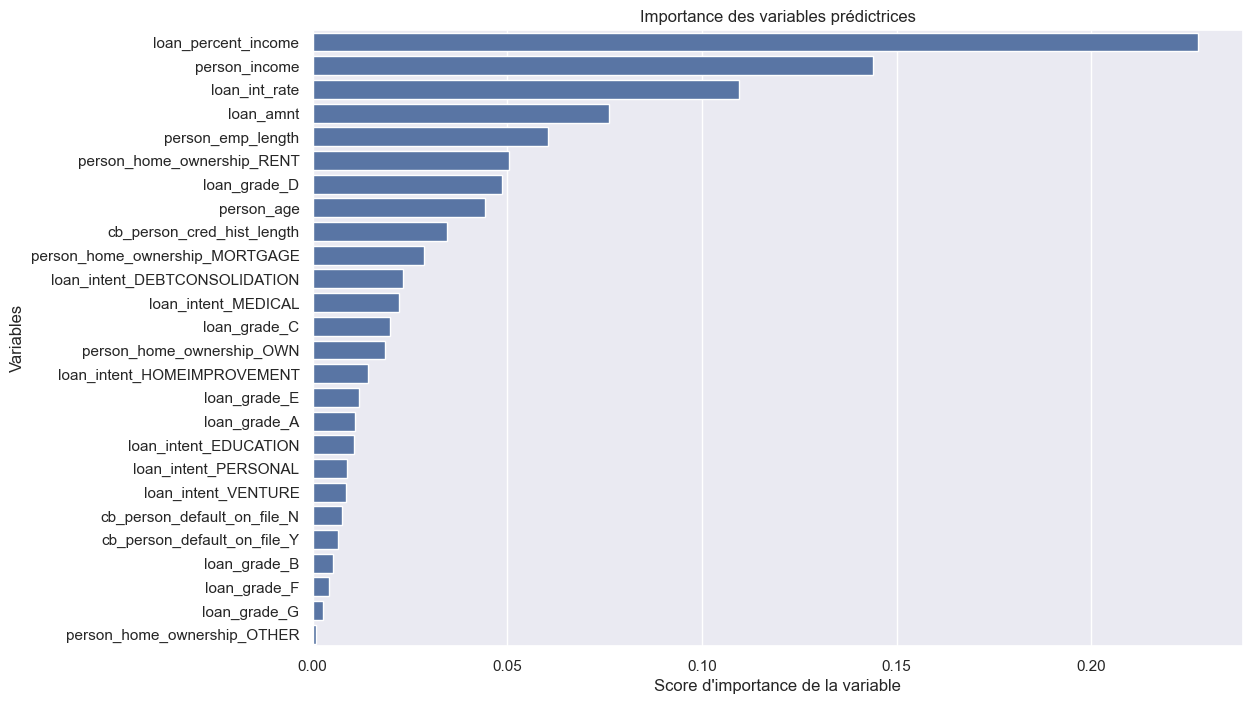

In [38]:
# Visualisation des variables importantes

sns.barplot(x=vars_imp, y=vars_imp.index)
plt.xlabel("Score d'importance de la variable")
plt.ylabel("Variables")
plt.title("Importance des variables prédictrices")
plt.show()

### Reconstruction d'un modèle de forêts aléatoires

Remodèlisons les données en ne considérant cette fois-ci que les variables dont le score d'importance est supérieur à 0.010.

In [39]:
# Variables dont le score d'importance est supérieur à 0.010
# On peut essayer plusieurs seuil et regarder les valeurs des métriques 

vars_selected = vars_imp[vars_imp > 0.010].index.to_list()

vars_selected

['loan_percent_income',
 'person_income',
 'loan_int_rate',
 'loan_amnt',
 'person_emp_length',
 'person_home_ownership_RENT',
 'loan_grade_D',
 'person_age',
 'cb_person_cred_hist_length',
 'person_home_ownership_MORTGAGE',
 'loan_intent_DEBTCONSOLIDATION',
 'loan_intent_MEDICAL',
 'loan_grade_C',
 'person_home_ownership_OWN',
 'loan_intent_HOMEIMPROVEMENT',
 'loan_grade_E',
 'loan_grade_A',
 'loan_intent_EDUCATION']

In [40]:
# Nouvelle division des données

# Train/test data

X_train, X_test, y_train, y_test = train_test_split(X[vars_selected], y, stratify= y, test_size=0.3, random_state=seed)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(21760, 18)
(9327, 18)
(21760,)
(9327,)


In [41]:
# Création du modèle 

rf2 = RandomForestClassifier(random_state=seed)

In [42]:
# Entraînement du mdoèle

rf2.fit(X_train, y_train)

RandomForestClassifier(random_state=123)

In [43]:
# prédictions

y_pred2 = rf2.predict(X_test)

In [45]:
# Rapport de classification 

print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      7290
           1       0.97      0.73      0.83      2037

    accuracy                           0.93      9327
   macro avg       0.95      0.86      0.89      9327
weighted avg       0.94      0.93      0.93      9327



#### Méthode de sous-échantillonnage

Imaginons qu'on ait 100 prêts dont 20 sont en défaut de paiement et 80 ne le sont pas. La méthode de sous-échantillonange consiste à échantillonner de façon aléatoire 20 prêts non-défauts et à les combiner avec les 20 prêts défauts de paiement pour former un ensemble de données équilibré.

In [46]:
# Concaténation de X_train et y_train

df_train = pd.concat([X_train.reset_index(drop = True), y_train.reset_index(drop = True)], axis = 1)

In [48]:
# Nombre de prêts dans chaque classe

n_nondefauts, n_defauts = df_train['loan_status'].value_counts()

In [52]:
# dataframe des prêts en défaut et dataframe des prêts en non défauts

defauts_df = df_train[df_train['loan_status'] == 1]

nondefauts_df = df_train[df_train['loan_status'] == 0]

In [53]:
# Sous-échantillonnage des non défauts pour qu'ils soient en même nombre que les défauts 

nondefauts_df2 = nondefauts_df.sample(n_defauts)

In [54]:
# Concaténation 
df_train2 = pd.concat([nondefauts_df2.reset_index(drop = True), defauts_df.reset_index(drop = True)], axis = 0)

In [55]:
# Vérification du nombre de prêts de chaque classe

df_train2['loan_status'].value_counts()

loan_status
0    4752
1    4752
Name: count, dtype: int64

Construisons maintenant un modèle de forêts aléatoires sur ce nouvel ensemble de données sous-échantilloné.

In [56]:
X = df_train2.drop('loan_status', axis=1) # X est une dataframe constituée uniquement des variables indépendantes de df

y = df_train2['loan_status'] # y est la variable dépendante (variable d'intérêt)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.3, random_state = seed)

In [57]:
# Création du modèle

rf3 = RandomForestClassifier(random_state = seed)

In [58]:
# Entraînement du modèle 

rf3.fit(X_train, y_train)

RandomForestClassifier(random_state=123)

In [59]:
# Prédiction 

y_pred3 = rf3.predict(X_test)

In [60]:
# Rapport de classification 

print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.81      0.91      0.86      1426
           1       0.90      0.78      0.84      1426

    accuracy                           0.85      2852
   macro avg       0.85      0.85      0.85      2852
weighted avg       0.85      0.85      0.85      2852



Ce rapport de classification indique le modèle rf3 prédit les défauts de paiement de manière beaucoup plus précise que les précédents modèles. En effet, 78% des prêts en défauts de paiement ont été correctement prédit contre 73% pour les deux modèles précédents.

### Conclusion

Dans ce projet, nous avons traité un problème de classification. Notre objectif était de construire un modèle qui prédit si le débiteur d'une banque sera en défaut de paiement ou pas. Un tel modèle est une véritable aide à la décision et permet aux banques de mieux gérer le risque de crédit.